In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 📚 assignments

## assignment 1
Dataframe Formatting

In [2]:
hotels = pd.read_excel('./data/HotelCustomersDataset.xlsx')

hotels['date'] = (
    pd.to_datetime('2018-12-31')
    - pd.to_timedelta(hotels['DaysSinceCreation'], unit='D')
).astype('datetime64[ns]')

daily_revenue = (
    hotels
    .groupby('date')
    .agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
)
monthly_revenue = daily_revenue.resample('M').sum()
monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


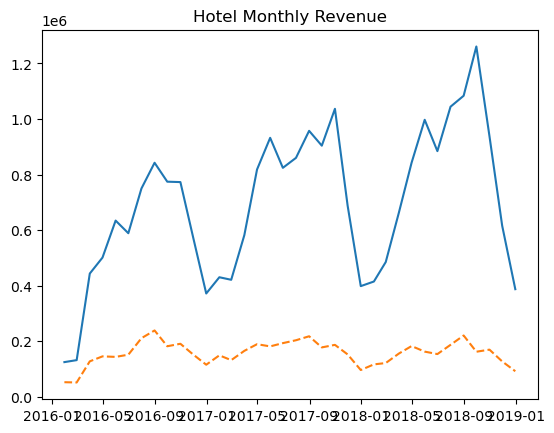

In [3]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'])
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'], linestyle='--')
ax.set_title('Hotel Monthly Revenue');

## assignment 2
Chart Formatting

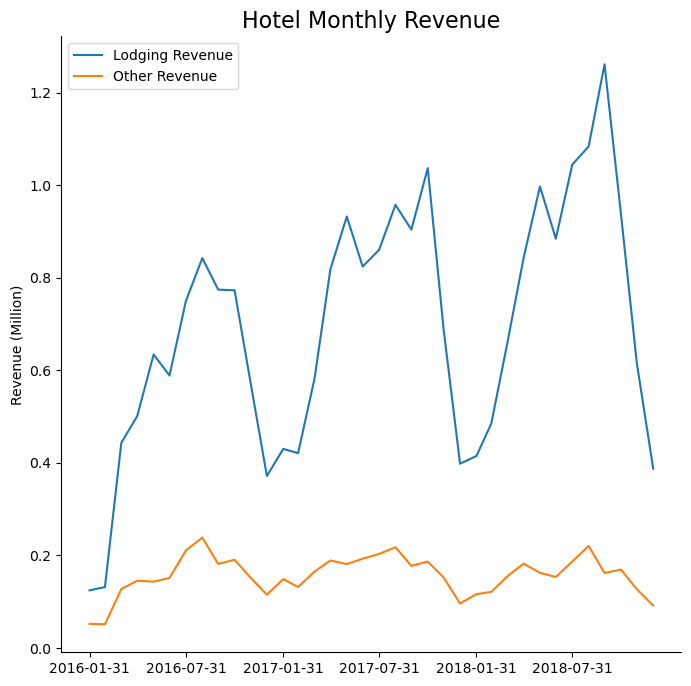

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(
    monthly_revenue.index,
    monthly_revenue['LodgingRevenue'] / 1000000,
    label='Lodging Revenue'
)

ax.plot(
    monthly_revenue.index,
    monthly_revenue['OtherRevenue'] / 1000000,
    label='Other Revenue'
)

ax.legend(loc='upper left')

ax.set_title('Hotel Monthly Revenue', fontsize=16)
ax.set_ylabel('Revenue (Million)')
ax.set_xticks(monthly_revenue.index[::6])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

## assignment 3

In [10]:
room_nights = hotels.groupby('date').agg({
    'RoomNights': 'sum',
    'BookingsCanceled': 'sum'
})
quarterly_bookings = room_nights.resample('Q').sum()

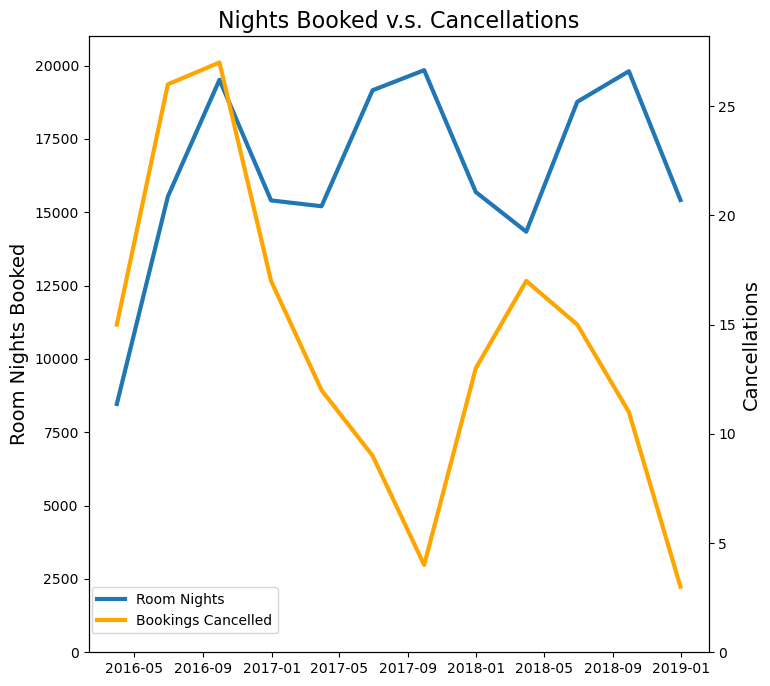

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(
    quarterly_bookings.index,
    quarterly_bookings['RoomNights'],
    label='Room Nights',
    linewidth=3
)
ax.set_title('Nights Booked v.s. Cancellations', fontsize=16)
ax.set_ylabel('Room Nights Booked', fontsize=14)
ax.set_ylim(0, 21000)

ax2 = ax.twinx()

ax2.plot(
    quarterly_bookings.index,
    quarterly_bookings['BookingsCanceled'],
    label='Bookings Cancelled',
    color='orange',
    linewidth=3
)
ax2.set_ylabel('Cancellations', fontsize=14)
ax2.set_ylim(0)

fig.legend(bbox_to_anchor=(.37, .2));

## assignment 4
- Bar Chart: of total room nights booked by 10 countries
- Horizontal Bar Chart: of lodging revenue by 10 same countries

In [18]:
hotels_by_countries = (
    hotels
    .groupby('Nationality')
    .agg({'RoomNights': 'sum', 'LodgingRevenue': 'sum'})
    .sort_values('RoomNights', ascending=False)
    .iloc[:10]
)

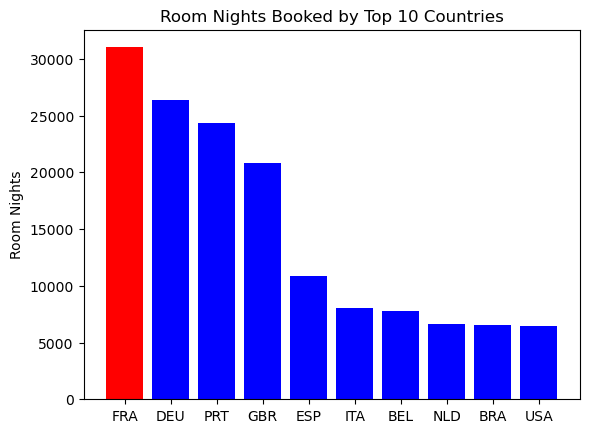

In [20]:
# 1. Bar Chart
colors = ['red'] + ['blue']*9

fig, ax = plt.subplots()

ax.bar(
    hotels_by_countries.index,
    hotels_by_countries['RoomNights'],
    color=colors
)

ax.set_title('Room Nights Booked by Top 10 Countries')
ax.set_ylabel('Room Nights');

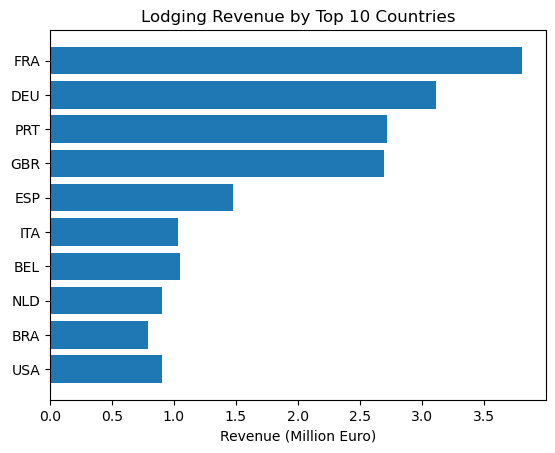

In [24]:
# 2. Horizontal Bar Chart
fig, ax = plt.subplots()

ax.barh(
    hotels_by_countries.index[::-1],
    hotels_by_countries['LodgingRevenue'][::-1] / 1000000
)

ax.set_title('Lodging Revenue by Top 10 Countries')
ax.set_xlabel('Revenue (Million Euro)');

## assignment 5
- Grouped Bar Chart: of Lodging Revenue and Other Revenues by 5 countries
- 100% Stacked Bar Chart (reference line at 80%)

In [37]:
countries = ['FRA', 'DEU', 'PRT', 'GBR', 'ESP']

target = (
    hotels
    .loc[hotels['Nationality'].isin(countries)]
    .groupby('Nationality')
    .agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum'})
    .sort_values('LodgingRevenue', ascending=False)
)
target

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


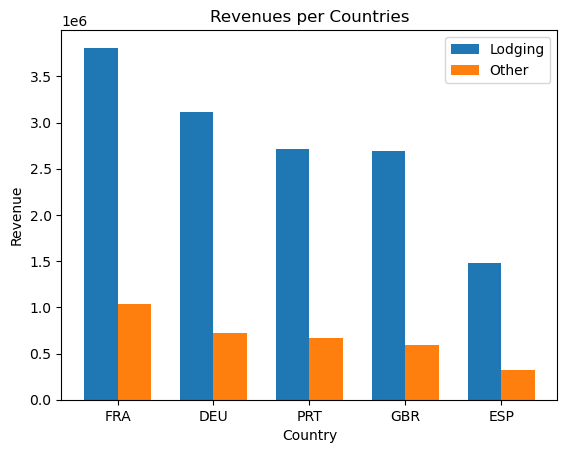

In [38]:
# 1. Grouped Bar Charts

fig, ax = plt.subplots()

x = np.arange(len(countries))
width = .35

ax.bar(
    x-width/2,
    target['LodgingRevenue'],
    width,
    label='Lodging'
)
ax.bar(
    x+width/2,
    target['OtherRevenue'],
    width,
    label='Other'
)

ax.set_title('Revenues per Countries')
ax.set_ylabel('Revenue')
ax.set_xlabel('Country')

ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)

ax.legend();

In [41]:
# 2. 100% Stacked Bar Charts
target_pct = target.apply(lambda x: x * 100 / sum(x), axis=1)
target_pct

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


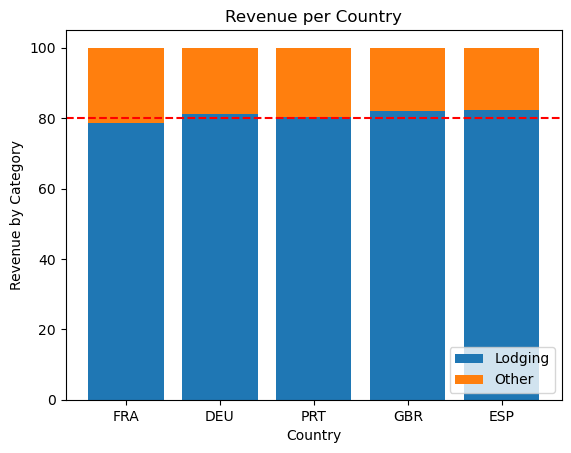

In [42]:
fig, ax = plt.subplots()

ax.bar(
    countries,
    target_pct['LodgingRevenue'],
    label='Lodging'
)
ax.bar(
    countries,
    target_pct['OtherRevenue'],
    label='Other',
    bottom=target_pct['LodgingRevenue']
)
ax.axhline(80, 0, 1, color='red', linestyle='--')

ax.set_title('Revenue per Country')
ax.set_ylabel('Revenue by Category')
ax.set_xlabel('Country')

ax.legend(loc='lower right');